In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = "C:/Users/PC/Documents/HRproject/captured_images/"

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 96 files belonging to 10 classes.
Using 77 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 96 files belonging to 10 classes.
Using 19 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


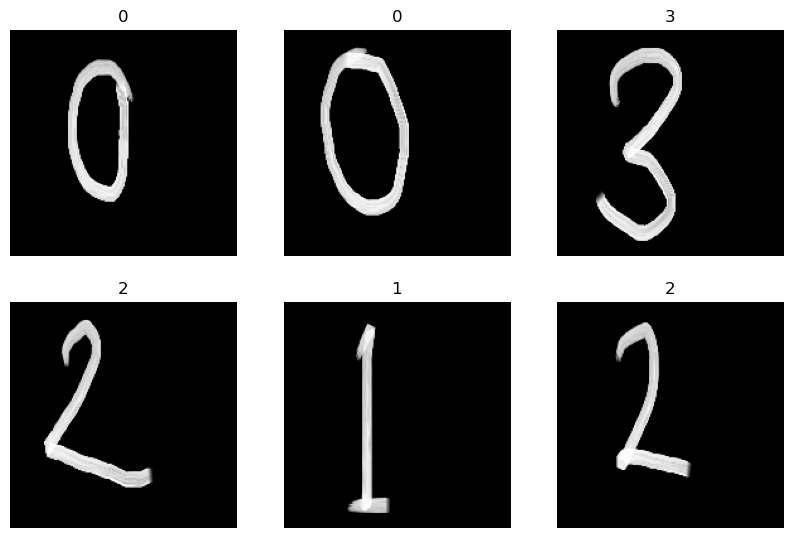

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=10,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 10)               5130      
 pper)                                                           
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
____________________________________

In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
epochs=20
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
    

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 7s 2s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 8/20
3/3 [=========================

In [20]:
result = resnet_model.evaluate(val_ds)

1/1 [==============================] - 1s 738ms/step - loss: 0.0334 - accuracy: 1.0000


In [21]:
print("Accuracy: ",result[1])

Accuracy:  1.0


C:\Users\PC\Documents\HRproject\captured_images\0\0.png


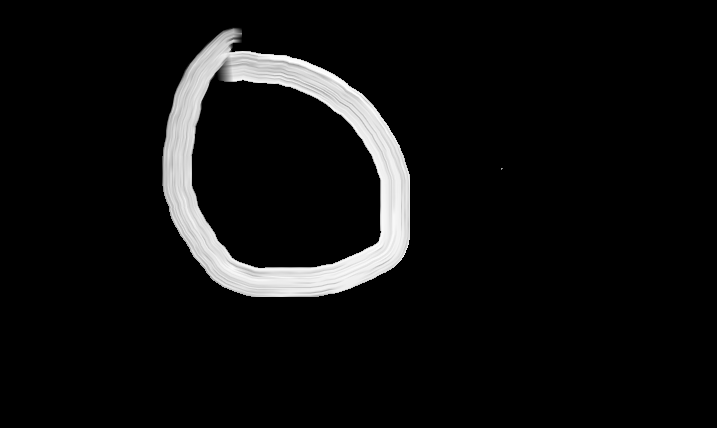

In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)

roses = list(data_dir.glob('0/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [23]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [24]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 79ms/step
[[9.9965870e-01 8.9014684e-08 6.5061056e-07 2.3183924e-07 3.9006096e-09
  6.4103222e-07 2.1201195e-04 2.3023027e-08 2.0526660e-07 1.2736929e-04]]


In [25]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 0


In [26]:
import joblib
# joblib.dump(resnet_model, "model/digit_recognizer")

In [27]:
# #prediction of image drawn in paint
# from PIL import Image
# import joblib
# import cv2
# import numpy as np #pip install numpy
# import time
# import pyscreenshot as ImageGrab
 
# # model=joblib.load("model/digit_recognizer")
# model = resnet_model
# images_folder="img/"
 
# while True:
#     img=ImageGrab.grab(bbox=(8, 196,725, 624))
#     img.save(images_folder+"img.png")
#     im = cv2.imread(images_folder+"img.png")
    
#     image_resized= cv2.resize(im, (img_height,img_width))
#     image=np.expand_dims(image_resized,axis=0)
#     predictions  =model.predict(image)
#     predictions = class_names[np.argmax(predictions)]
#     print("Prediction:",predictions)
#     cv2.putText(im, "Prediction is: "+str(predictions), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)

#     cv2.startWindowThread()
#     cv2.namedWindow("Result")
#     cv2.imshow("Result",im)
#     cv2.waitKey(10000)
#     if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
#        break

    
       
# cv2.destroyAllWindows()
 
